### Contents
#### Importing libraries
#### Importing data sets
#### Bar charts
#### Creating bar plot index order
#### Index sort without plot
#### Creating bar plot index order with color
#### Creating histogram
#### Creating scatterplot
#### Checking high-priced items
#### Setting outlier prices as Nan
#### Setting new max price
#### Creating new prices histogram
#### Line Charts
#### Sampling data for quicker calculations

### Importing libraries and Data

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#defining path
path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'

In [4]:
# Import df_ords_prods_merged
df_ords_prods_merged2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged.csv'), index_col = 0)

### Bar charts

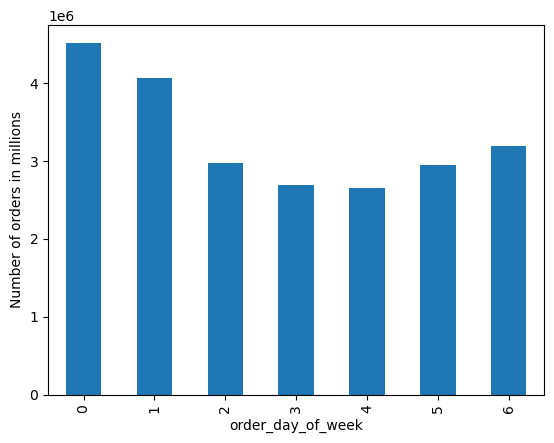

In [38]:
# Value counts for order_day_of_week
order_counts = df_ords_prods_merged2['order_day_of_week'].value_counts().sort_index()

# Create a bar chart
order_counts.plot(kind='bar')

# Add a y-axis label
plt.ylabel('Number of orders in millions')

# Define the file path where you want to save the chart
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_day_of_week.png')

# Verify that the path exists
if os.path.exists(os.path.dirname(save_path)):
    # Save the chart to the specified path
    plt.savefig(save_path)
else:
    print("The directory to save the chart does not exist.")

# Display the chart
plt.show()


In [7]:
# Index sort without plot
df_ords_prods_merged2['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    4517719
1    4070089
2    2975212
3    2688426
4    2647223
5    2951822
6    3195080
Name: count, dtype: int64

<Axes: xlabel='order_day_of_week'>

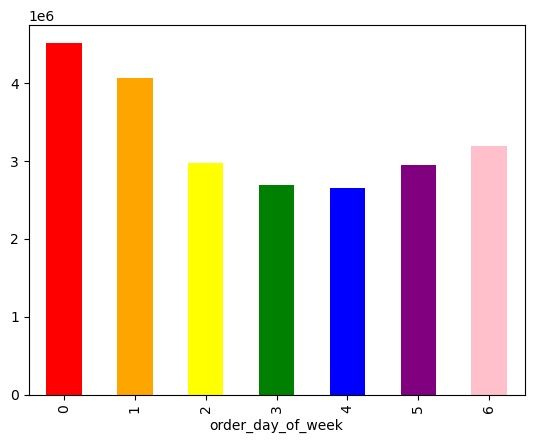

In [8]:
# Creating bar plot index order with color
df_ords_prods_merged2['order_day_of_week'].value_counts().sort_index().plot.bar(color=['red','orange','yellow','green','blue','purple','pink'])

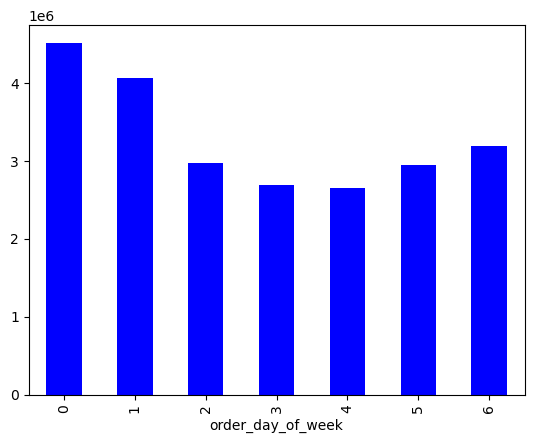

In [9]:
# Saving chart
bar = df_ords_prods_merged2['order_day_of_week'].value_counts().sort_index().plot.bar(color=['blue'])

In [10]:
# Saving bar plot
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histograms and Scatterplots

<Axes: ylabel='Frequency'>

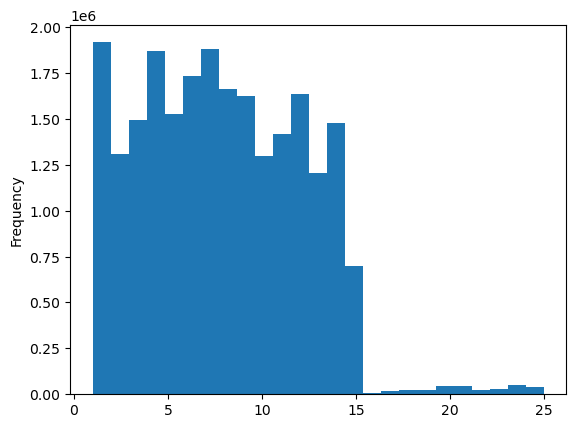

In [11]:
# Prices histogram
df_ords_prods_merged2['prices'].plot.hist(bins = 25)

In [12]:
df_ords_prods_merged2['prices'].describe()

count    2.304557e+07
mean     7.879597e+00
std      4.244528e+00
min      1.000000e+00
25%      4.400000e+00
50%      7.500000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [13]:
# Mean price
df_ords_prods_merged2['prices'].mean()

7.879596587127303

In [14]:
# Median price
df_ords_prods_merged2['prices'].median()

7.5

In [15]:
# Max price: different from the Exercise, but still an outlier
df_ords_prods_merged2['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

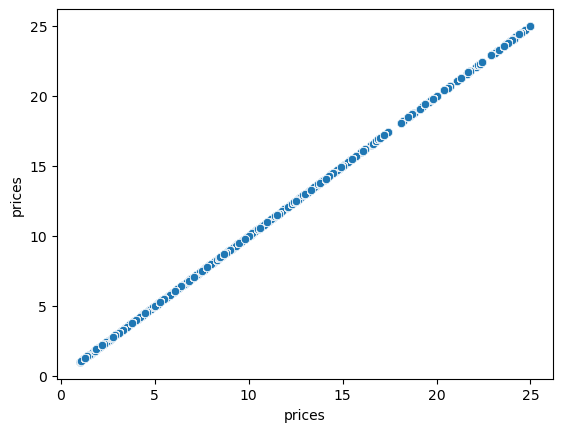

In [16]:
# Creating scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merged2)

In [17]:
# Checking high-priced items
df_ords_prods_merged2.loc[df_ords_prods_merged2['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day


In [18]:
# Setting outlier prices as Nan
df_ords_prods_merged2.loc[df_ords_prods_merged2['prices'] >100, 'prices'] = np.nan

In [19]:
# New max price
df_ords_prods_merged2['prices'].max()

25.0

<Axes: ylabel='Frequency'>

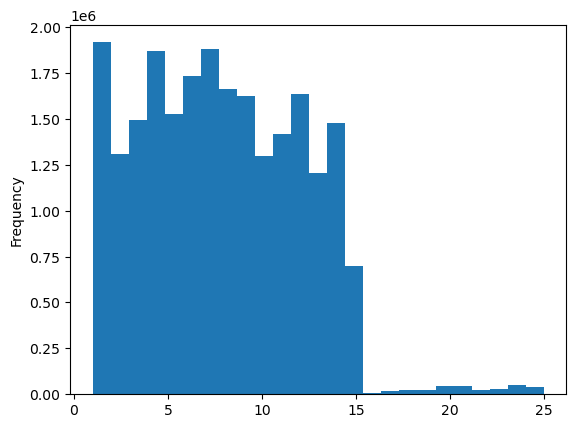

In [20]:
# New prices histogram
df_ords_prods_merged2['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

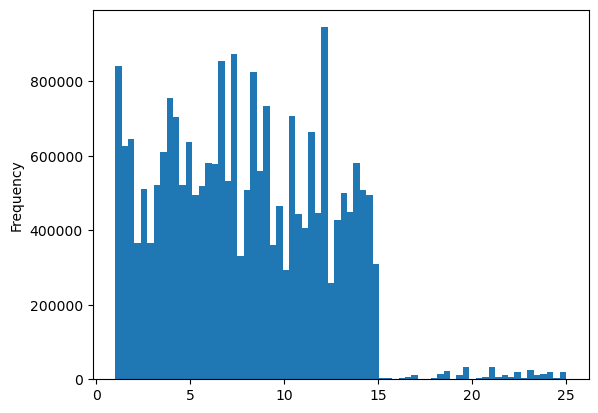

In [21]:
# New prices histogram with more granularity
df_ords_prods_merged2['prices'].plot.hist(bins = 70)

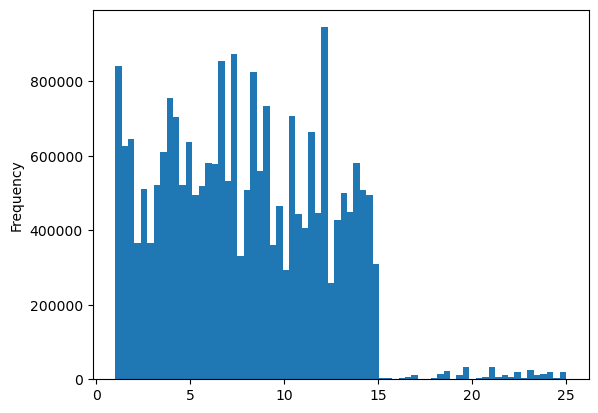

In [22]:
# Saving chart as hist
hist = df_ords_prods_merged2['prices'].plot.hist(bins = 70)

In [23]:
# Saving histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_frequency.png'))

#### Line Charts

In [24]:
# Sampling data: Create a list holding the true/false values to the test np.random.rand()<=0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged2)) <= 0.7

In [25]:
dev

array([False,  True, False, ...,  True, False, False])

In [26]:
np.random.rand(10)

array([0.95960915, 0.79903552, 0.56954301, 0.05952667, 0.78083642,
       0.42548846, 0.95933893, 0.96872589, 0.85762031, 0.87928476])

In [27]:
# Creating big and small dataframes
big = df_ords_prods_merged2[dev]

In [28]:
small = df_ords_prods_merged2[~dev]

In [29]:
# Checking df lengths
len(df_ords_prods_merged2)

23045571

In [30]:
len(big)+len(small)

23045571

In [31]:
# Creating new df with only necessary columns
df_2 = small[['order_day_of_week','prices']]

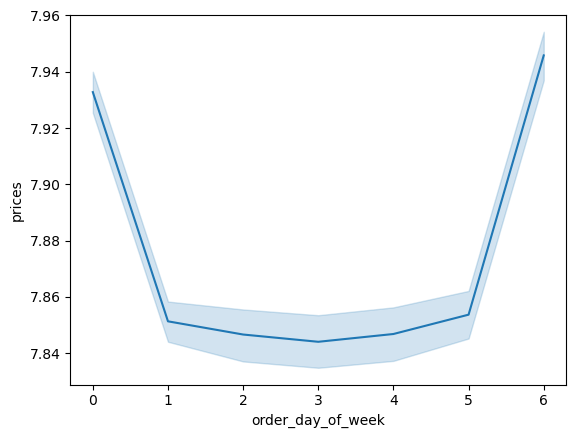

In [32]:
# Creating line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [33]:
# Saving line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))

In [34]:
df_ords_prods_merged2.shape

(23045571, 20)